# Eliminación de marcas de agua con GAN basada en U-Net

TODO: Resumen del Notebook

## Configuración y librerías

In [9]:
import yaml
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np

from water_mark_remover import load_and_prepare_data, data_augmentation

In [2]:
CONFIG_PATH = "config/"
EXAMPLE_CONFIG_FILE_NAME = "example_config.yml"

# Read config file
with open(CONFIG_PATH + EXAMPLE_CONFIG_FILE_NAME, 'r') as f:
    config = yaml.safe_load(f)
config

{'load_and_prepare_data': {'train_wm_path': 'wm-nowm/train/watermark/',
  'train_nwm_path': 'wm-nowm/train/no-watermark/',
  'valid_wm_path': 'wm-nowm/valid/watermark/',
  'valid_nwm_path': 'wm-nowm/valid/no-watermark/',
  'train_size': 0.8,
  'width': 128,
  'height': 128},
 'discriminador': {'learning_rate': 0.001},
 'generador': {'learning_rate': 0.001},
 'training': {'epochs': 100}}

## Carga y procesado de los datos

In [3]:
X_train, X_test, y_train, y_test, X_val, y_val = load_and_prepare_data(
    **config["load_and_prepare_data"]
)

2023-12-15 22:00:36.419552: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-15 22:00:36.427154: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-15 22:00:36.427478: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [4]:
X_train.shape

(2788, 128, 128, 3)

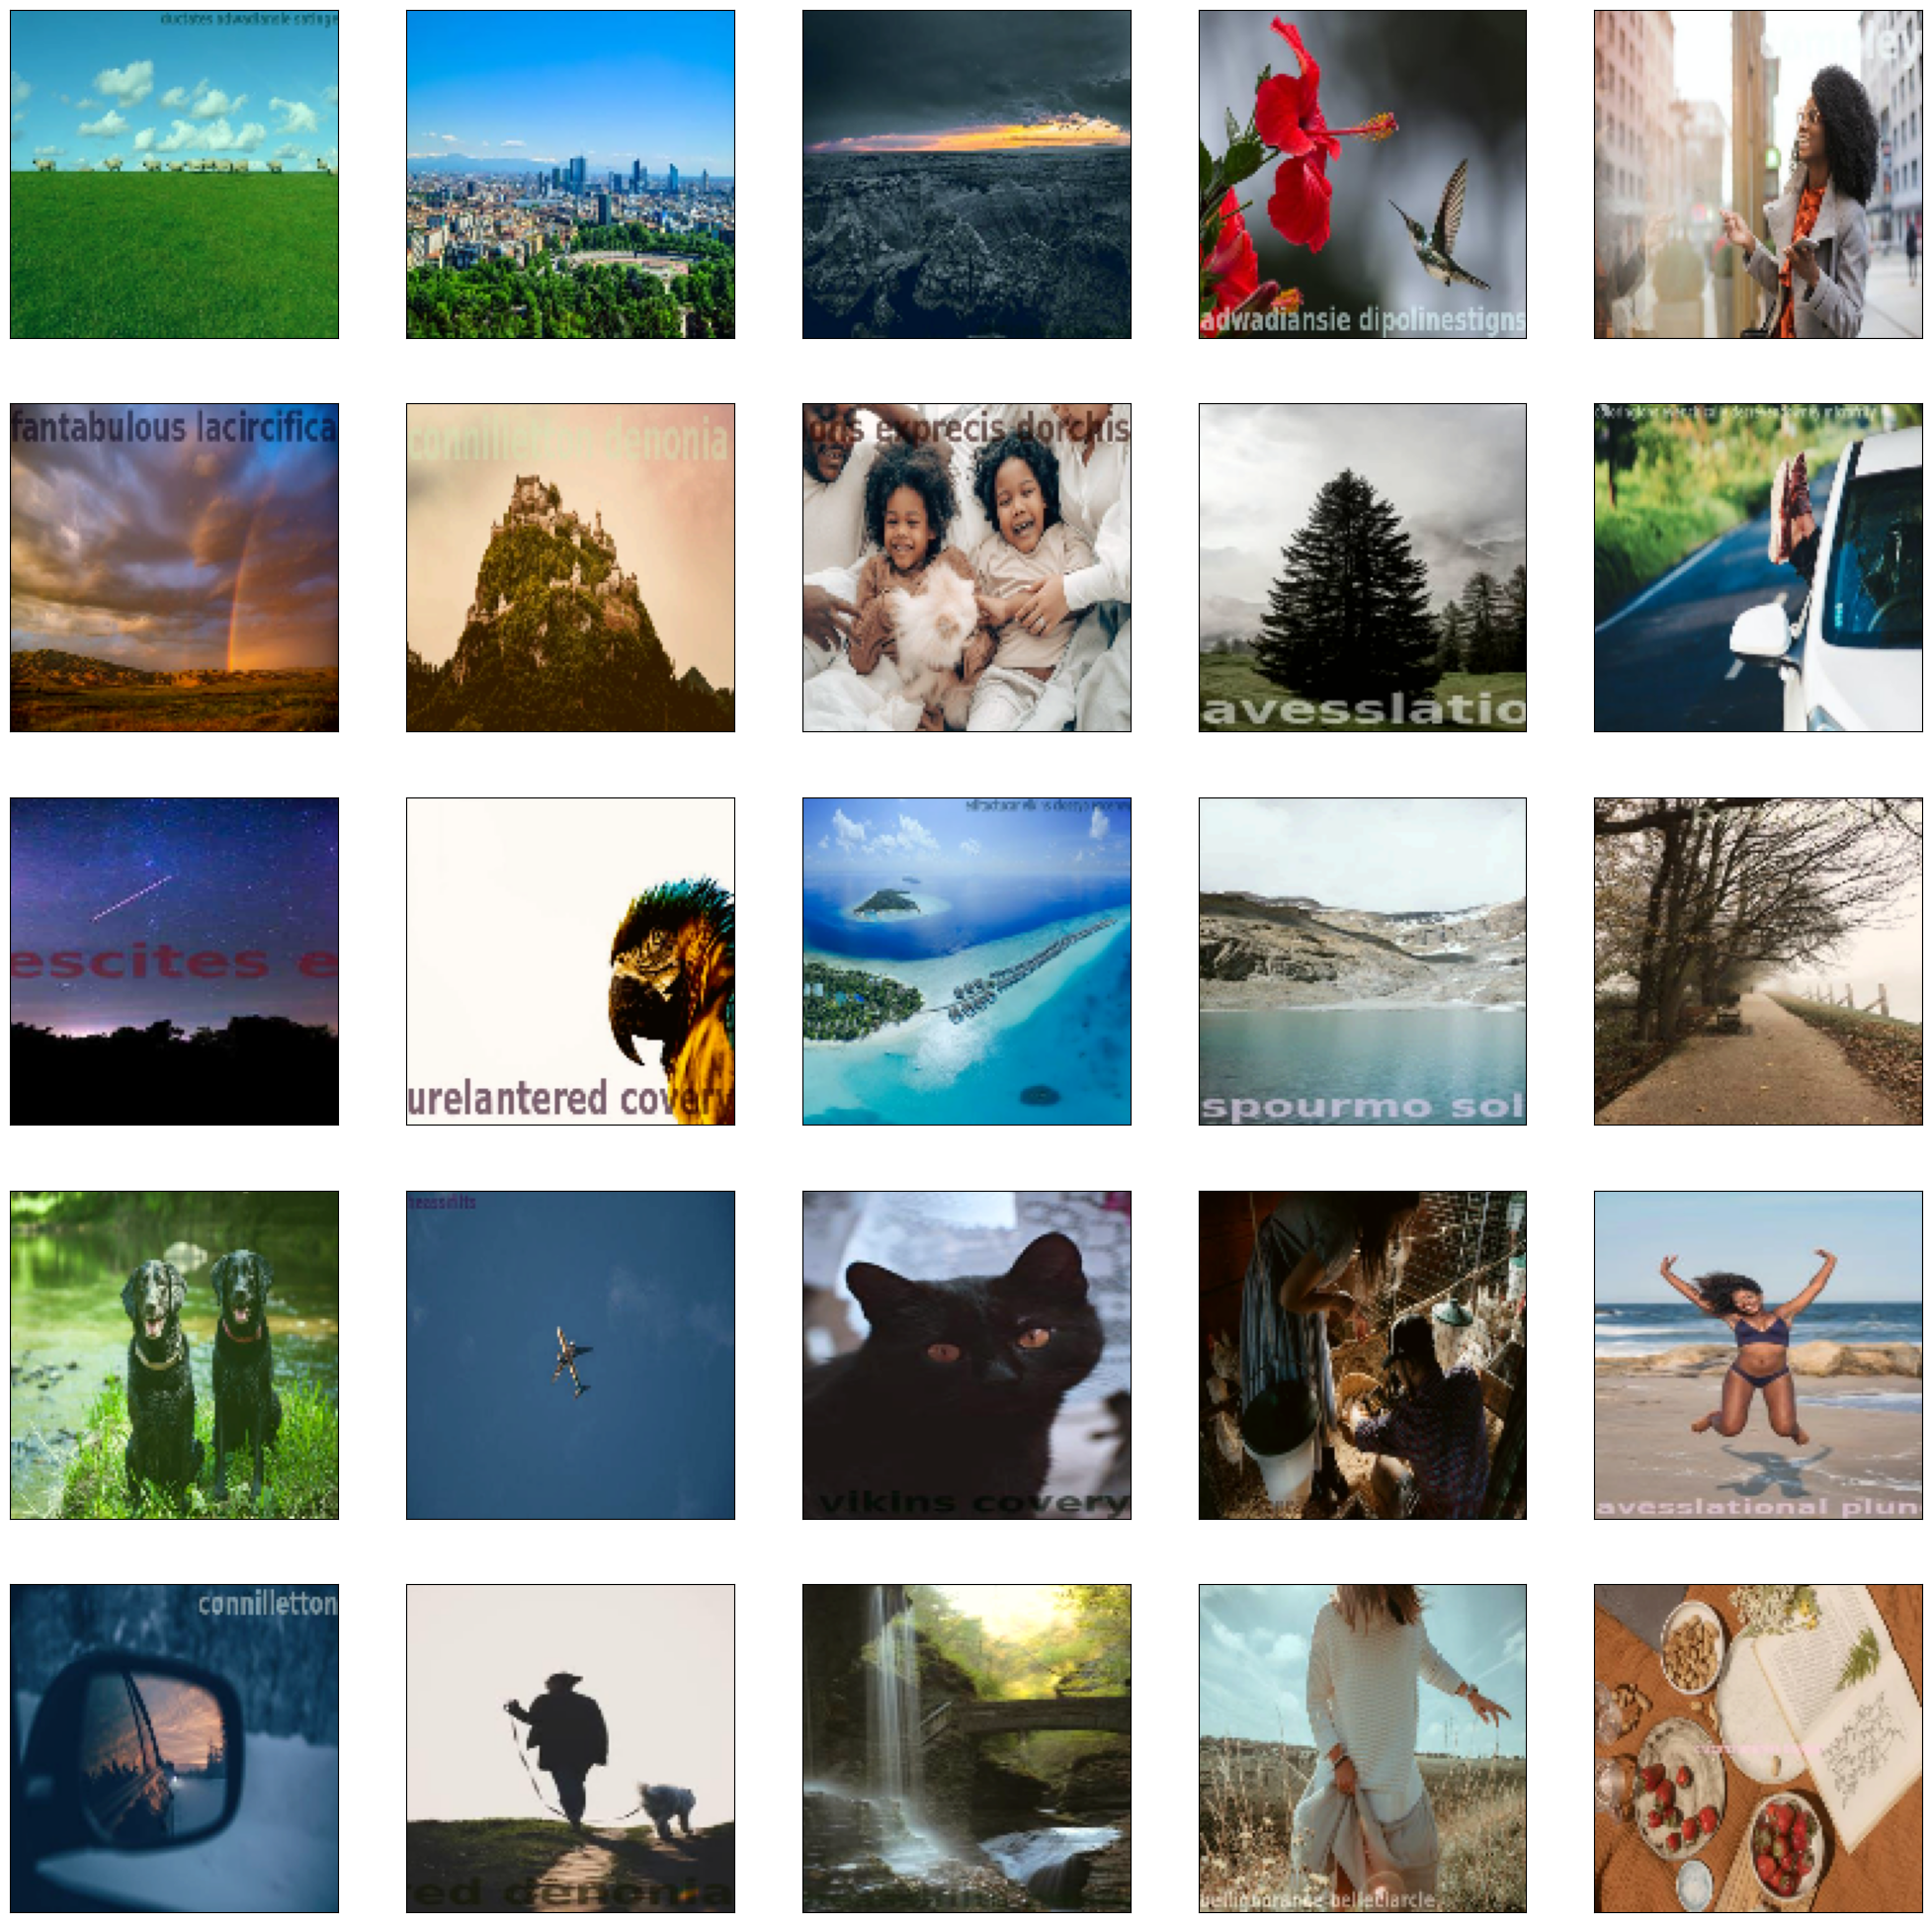

In [10]:
# Output Tensorflow data augmented images
plt.figure(figsize=(25, 25))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    augmented_image = X_train[random.randint(1, len(X_train))]

    # Normalize and convert to 8-bit format if necessary
    if augmented_image.dtype != np.uint8:
        augmented_image = (augmented_image - augmented_image.min()) / (
            augmented_image.max() - augmented_image.min()
        )
        augmented_image = (augmented_image * 255).astype(np.uint8)

    plt.imshow(
        cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB)
    )  # not using cv2 as it messed up the code
plt.show()